Question 10

Optimal k: 3
Accuracy: 0.6842
Specificity: 0.7576
Sensitivity: 0.5833
Precision: 0.6364


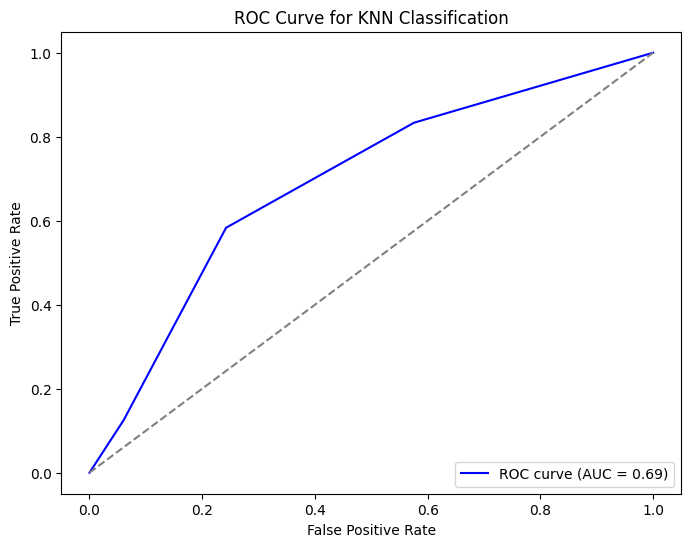

AUC Score: 0.6932
Predicted outcome for first new consumer record: 0

Performance with Cutoff 0.3:
Accuracy: 0.5965
Specificity: 0.4242
Sensitivity: 0.8333
Precision: 0.5128


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score


socialmedia_data = pd.read_excel("/content/jaggia_ba_2e_ch12_data.xlsx", sheet_name="SocialMedia_Data", engine='openpyxl')
socialmedia_score = pd.read_excel("/content/jaggia_ba_2e_ch12_data.xlsx", sheet_name="SocialMedia_Score", engine='openpyxl')

# features and target variable
X = socialmedia_data[['Income', 'Age']]
y = socialmedia_data['SocialMedia']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# optimal k
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# the best k value
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k: {optimal_k}")

# Train the KNN model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

#  the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#  performance metrics
accuracy = accuracy_score(y_test, y_pred)
specificity = tn / (tn + fp)  # True Negative Rate
sensitivity = tp / (tp + fn)  # Recall / True Positive Rate
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")

# the probability scores for the test set
y_scores = knn.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# AUC score
auc_score = roc_auc_score(y_test, y_scores)

# ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.4f}")

# the outcome for the first new consumer record
new_data_scaled = scaler.transform(socialmedia_score.iloc[[0]])  # Scale new consumer data
new_prediction = knn.predict(new_data_scaled)
print(f"Predicted outcome for first new consumer record: {new_prediction[0]}")

#  cutoff value to 0.3 and compute new metrics
y_pred_cutoff_03 = (y_scores >= 0.3).astype(int)

#  new confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cutoff_03).ravel()

# new performance metrics
accuracy_03 = accuracy_score(y_test, y_pred_cutoff_03)
specificity_03 = tn / (tn + fp)
sensitivity_03 = tp / (tp + fn)
precision_03 = precision_score(y_test, y_pred_cutoff_03)

print("\nPerformance with Cutoff 0.3:")
print(f"Accuracy: {accuracy_03:.4f}")
print(f"Specificity: {specificity_03:.4f}")
print(f"Sensitivity: {sensitivity_03:.4f}")
print(f"Precision: {precision_03:.4f}")


Question 8

Optimal k: 7
Accuracy: 0.7917
Specificity: 1.0000
Sensitivity: 0.7368
Precision: 1.0000


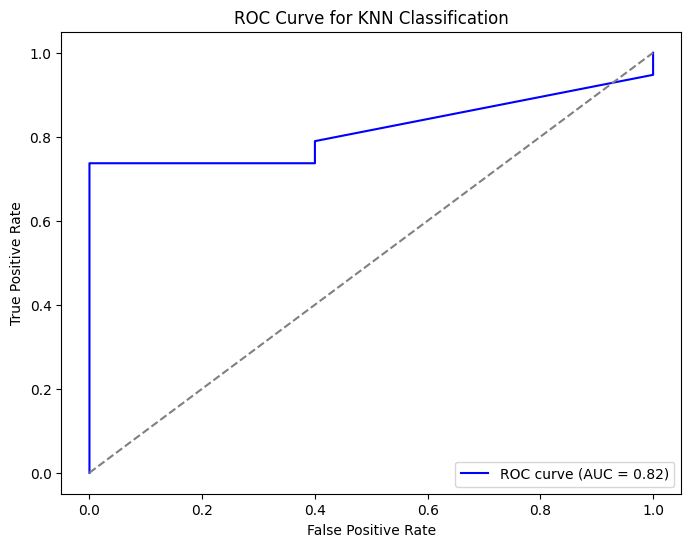

AUC Score: 0.8158
Predicted admission outcome for first new applicant: 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score


admit_data = pd.read_excel("/content/jaggia_ba_2e_ch12_data.xlsx", sheet_name="Admit_Data", engine='openpyxl')
admit_score = pd.read_excel("/content/jaggia_ba_2e_ch12_data.xlsx", sheet_name="Admit_Score", engine='openpyxl')

#  features and target variable
X = admit_data[['GPA', 'SAT']]
y = admit_data['Admit']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  training and testing sets 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  optimal k using accuracy scores
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

#  the best k value
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k: {optimal_k}")

# Train the KNN model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#  performance metrics
accuracy = accuracy_score(y_test, y_pred)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")

#  the probability scores for the test set
y_scores = knn.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_scores)

# ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.4f}")

# the outcome for the first new applicant
new_data_scaled = scaler.transform(admit_score.iloc[[0]])  # Scale new applicant data
new_prediction = knn.predict(new_data_scaled)
print(f"Predicted admission outcome for first new applicant: {new_prediction[0]}")


PART 3

Best Parameters: {'n_neighbors': 2}
Accuracy: 0.5714285714285714
Confusion Matrix:
[[35  8]
 [19  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        43
           1       0.11      0.05      0.07        20

    accuracy                           0.57        63
   macro avg       0.38      0.43      0.40        63
weighted avg       0.48      0.57      0.51        63



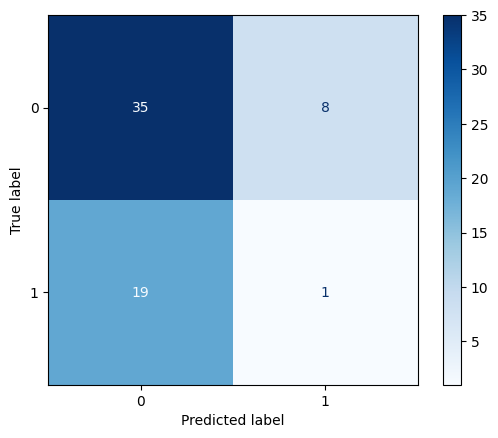

   Job  GPA  Sports  Leadership  Prediction
0    0    1       0           0           0
1    1    1       1           0           0
2    1    0       0           0           0
3    0    1       1           0           0
4    1    0       0           1           0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


data = pd.read_excel('/content/jaggia_ba_2e_ch122_data.xlsx', sheet_name='Grit_Data')

#  features and target variable
X = data.drop(columns=['Sports', 'Success'])  # Exclude target and unrelated column
y = data['Success']

#  training 60% and testing 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=321)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  KNN classifier with hyperparameter tuning
param_grid = {'n_neighbors': range(1, 11)}
knn = KNeighborsClassifier()
search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
search.fit(X_train_scaled, y_train)

# Best model
best_knn = search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test_scaled)

#  model performance
print("Best Parameters:", search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

#  confusion matrix
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.show()

#
score_data = pd.read_excel('/content/jaggia_ba_2e_ch122_data.xlsx', sheet_name='Grit_Score')

# the columns used during training
score_data_subset = score_data[X.columns]  # Dynamically match training columns

#  scaling and predict
score_data_scaled = scaler.transform(score_data_subset)
score_predictions = best_knn.predict(score_data_scaled)
score_data['Prediction'] = score_predictions
print(score_data.head())